In [2]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data2 = pd.read_csv("uw_aq.csv") #1571814000
#2019-11-23 07:56:05+00:00 36828
#2019-10-23 07:57:06+00:00 27421    
print(data2[27600:27650])

                  deviceTime_utc           deviceTime_local  deviceTime_unix  \
27600  2019-10-23 22:52:06+00:00  2019-10-23 15:52:06-07:00     1.571871e+09   
27601  2019-10-23 22:57:05+00:00  2019-10-23 15:57:05-07:00     1.571871e+09   
27602  2019-10-23 23:02:05+00:00  2019-10-23 16:02:05-07:00     1.571872e+09   
27603  2019-10-23 23:07:06+00:00  2019-10-23 16:07:06-07:00     1.571872e+09   
27604  2019-10-23 23:12:06+00:00  2019-10-23 16:12:06-07:00     1.571872e+09   
27605  2019-10-23 23:17:05+00:00  2019-10-23 16:17:05-07:00     1.571873e+09   
27606  2019-10-23 23:22:05+00:00  2019-10-23 16:22:05-07:00     1.571873e+09   
27607  2019-10-23 23:27:06+00:00  2019-10-23 16:27:06-07:00     1.571873e+09   
27608  2019-10-23 23:32:06+00:00  2019-10-23 16:32:06-07:00     1.571874e+09   
27609  2019-10-23 23:37:05+00:00  2019-10-23 16:37:05-07:00     1.571874e+09   
27610  2019-10-23 23:42:05+00:00  2019-10-23 16:42:05-07:00     1.571874e+09   
27611  2019-10-23 23:47:06+00:00  2019-1

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data2 = pd.read_csv("uw.csv")
#29498    2019-10-23 07:56:41+00:00
#2019-11-23 07:55:37+00:00 40897
        


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data2 = pd.read_csv("uw_d3s.csv") #1571814000
#2019-11-23 07:57:46+00:00 42311
#2019-10-23 07:57:43+00:00 31847    
        


p-value:  0.4198413172  slope:  0.0019372562  y intercept:  2.239 
 r squared:  0.0009  standard error:  0.0024000994


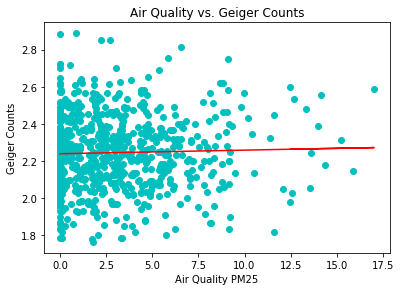

In [2]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("uw_aq.csv") #33000 to 39000
data2 = pd.read_csv("uw.csv")

interval = 3600
start_time = data.iloc[27421,2]
end_time = data.iloc[36828 ,2]
cpm_hour = []
interval_difference = end_time - start_time
count = 0


start_time2 = data2.iloc[29498, 2]
end_time2 = data2.iloc[40897, 2]
interval_difference2 = end_time2 - start_time2
count2 = 0
cpm_hour2 = []


#########################################################################################################################

while count < int(interval_difference):
    selection_mask = (data['deviceTime_unix'] > (start_time + count)) & (data['deviceTime_unix'] < (start_time + count + interval))
    tempData = data[selection_mask]
    if (len(tempData) == 0):
        cpm_hour.append(None)
    else:
        cpm_hour.append(np.mean(tempData['PM25'])) 
    count += interval

while count2 < int(interval_difference2):
    selection_mask2 = (data2['deviceTime_unix'] > (start_time2 + count2)) & (data2['deviceTime_unix'] < (start_time2 + count2 + interval))
    tempData2 = data2[selection_mask2]
    if (len(tempData2) == 0):
        cpm_hour2.append(None)
    else:
        cpm_hour2.append(np.mean(tempData2['cpm']))       
    count2 += interval
        
counter = 0
while counter < len(cpm_hour):
    if (cpm_hour[counter] == None) or (cpm_hour2[counter] == None):
        del cpm_hour[counter]
        del cpm_hour2[counter]
    else:
        counter+=1
        
#########################################################################################################################################

x = cpm_hour
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
y = cpm_hour2
ax.set_title('Air Quality vs. Geiger Counts')
plt.ylabel('Geiger Counts')
plt.xlabel('Air Quality PM25')

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
m,b = np.polyfit(x, y, 1)

plt.plot(x,y, 'co', x, poly1d_fn(x),'r')

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("p-value: ", round(p_value,10), " slope: ", round(slope,10), " y intercept: ",  round(intercept, 3),"\n", "r squared: ", round((r_value)**2, 4), " standard error: ", round(std_err, 10))

2678339.0
2677803
726
726
p-value:  7e-10  slope:  3.2248266655  y intercept:  1062.031 
 r squared:  0.0514  standard error:  0.5151110006


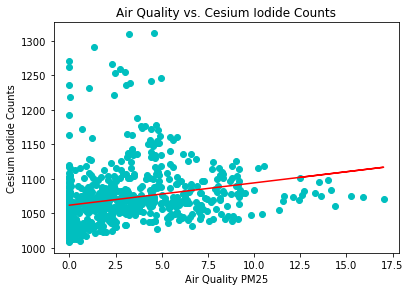

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("uw_aq.csv") #33000 to 39000
data2 = pd.read_csv("uw_d3s.csv")

interval = 3600
start_time = data.iloc[27421,2]
end_time = data.iloc[36828 ,2]
cpm_hour = []
interval_difference = end_time - start_time
count = 0


start_time2 = data2.iloc[31847, 2]
end_time2 = data2.iloc[42309, 2]
interval_difference2 = end_time2 - start_time2
count2 = 0
cpm_hour2 = []

print(interval_difference)
print(interval_difference2)
#########################################################################################################################

while count < int(interval_difference):
    selection_mask = (data['deviceTime_unix'] > (start_time + count)) & (data['deviceTime_unix'] < (start_time + count + interval))
    tempData = data[selection_mask]
    if (len(tempData) == 0):
        cpm_hour.append(None)
    else:
        cpm_hour.append(np.mean(tempData['PM25'])) 
    count += interval

while count2 < int(interval_difference2):
    selection_mask2 = (data2['deviceTime_unix'] > (start_time2 + count2)) & (data2['deviceTime_unix'] < (start_time2 + count2 + interval))
    tempData2 = data2[selection_mask2]
    if (len(tempData2) == 0):
        cpm_hour2.append(None)
    else:
        cpm_hour2.append(np.mean(tempData2['cpm']))       
    count2 += interval
        
counter = 0
while counter < len(cpm_hour):
    if (cpm_hour[counter] == None) or (cpm_hour2[counter] == None):
        del cpm_hour[counter]
        del cpm_hour2[counter]
    else:
        counter+=1
        
#########################################################################################################################################
print(len(cpm_hour))
print(len(cpm_hour2))
time = list(data.iloc[69743:74985, 2])
newTime = list(range(len(cpm_hour)))
x = cpm_hour
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
y = cpm_hour2
ax.set_title('Air Quality vs. Cesium Iodide Counts')
plt.ylabel('Cesium Iodide Counts')
plt.xlabel('Air Quality PM25')
#plt.scatter(cpm_hour,cpm_hour2, marker='o')

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y
m,b = np.polyfit(x, y, 1)

plt.plot(x,y, 'co', x, poly1d_fn(x),'r')

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("p-value: ", round(p_value,10), " slope: ", round(slope,10), " y intercept: ",  round(intercept, 3),"\n", "r squared: ", round((r_value)**2, 4), " standard error: ", round(std_err, 10))